<a href="https://colab.research.google.com/github/krooner/CS492-MLCV-CW1/blob/main/Copy_of_Incremental_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/My\ Drive/CS492/face.mat .

Mounted at /content/drive


In [ ]:
import numpy as np
import scipy.io
mat = scipy.io.loadmat('face.mat')
data=mat['X']
label=mat['l']

In [ ]:
D,N=np.shape(data)
C=int(N/10)
N_train=int(N*0.8)
N_test=N-N_train
train_data=np.zeros((D, N_train))
train_label=np.zeros((N_train,))
test_data=np.zeros((D, N_test))
test_label=np.zeros((N_test,))

In [ ]:
train_idx=0;
test_idx=0;

for ps in range(C):
  for train in range(8):
    train_data[:,train_idx]=data[:,ps*10+train]
    train_label[train_idx]=label[:,ps*10+train]
    train_idx+=1
  for test in range(8,10):
    test_data[:,test_idx]=data[:,ps*10+test]
    test_label[test_idx]=label[:,ps*10+test]
    test_idx+=1

In [ ]:
mean_global=np.mean(train_data, axis=1)
mean_matrix=np.transpose(np.tile(mean_global, (N_train,1)))
A=train_data-mean_matrix

In [ ]:
from numpy import linalg as LA
w, v=LA.eig()

In [ ]:
x=[i*10 for i in range(1,42)]

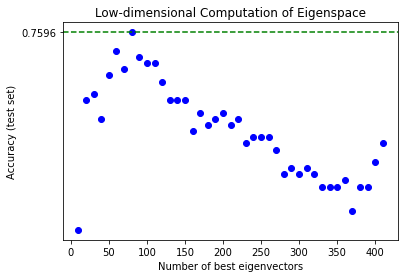

In [ ]:
import matplotlib.pyplot as plt
plt.title('Low-dimensional Computation of Eigenspace')
plt.plot(x, l, 'bo')
plt.xlabel('Number of best eigenvectors')
plt.ylabel('Accuracy (test set)')
plt.yticks([round(max(l),4)])
plt.axhline(y=max(l), ls='--', c='green')
plt.savefig('m_acc_pca.png')
plt.show()


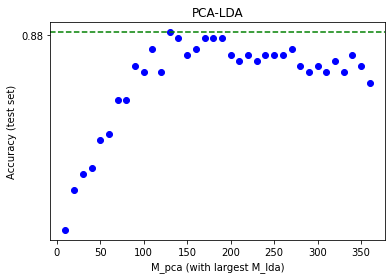

In [ ]:
x=[i*10 for i in range(1,37)]
import matplotlib.pyplot as plt
plt.title('PCA-LDA')
plt.plot(x, l, 'bo')
plt.xlabel('M_pca (with largest M_lda)')
plt.ylabel('Accuracy (test set)')
plt.yticks([round(max(l),2)])
plt.axhline(y=max(l), ls='--', c='green')
plt.savefig('m_acc_pcalda.png')
plt.show()

In [ ]:
import scipy.io as sio
data=sio.loadmat('ldc_415.mat')
data2=sio.loadmat('lda_364.mat')

In [ ]:
import numpy as np
data=np.reshape(data['result_ldc'], (415,))
data2=np.reshape(data2['result_lda'], (364,))

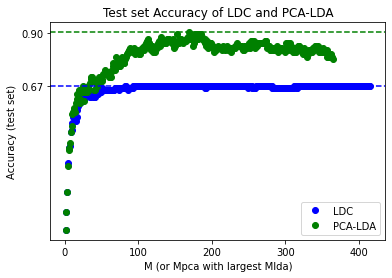

In [ ]:
xl=[i for i in range(1,416)]
xp=[i for i in range(1,365)]
import matplotlib.pyplot as plt
plt.title('Test set Accuracy of LDC and PCA-LDA')
line1,=plt.plot(xl, data, 'bo', label='LDC')
line2,=plt.plot(xp, data2, 'go', label='PCA-LDA')
plt.legend([line1, line2],['LDC','PCA-LDA'])
plt.xlabel('M (or Mpca with largest Mlda)')
plt.ylabel('Accuracy (test set)')
plt.yticks([round(max(data),2),round(max(data2),2)])
plt.axhline(y=max(data), ls='--', c='blue')
plt.axhline(y=max(data2), ls='--', c='green')
plt.savefig('ACC.png')
plt.show()

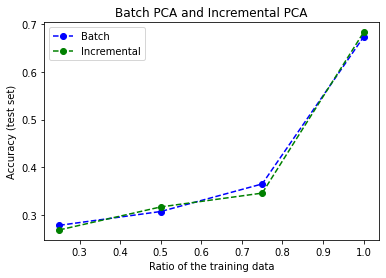

In [ ]:
# xl=[i for i in range(1,416)]
# xp=[i for i in range(1,365)]
import matplotlib.pyplot as plt
plt.title('Batch PCA and Incremental PCA')
line1,=plt.plot([0.25,0.5,0.75,1],[0.2788,0.3077,0.3654,0.6731], linestyle='--', marker='o', color='b', label='BPCA')
line2,=plt.plot( [0.25,0.5,0.75,1],[0.2692,0.3173,0.3462,0.6827], linestyle='--', marker='o', color='g', label='IPCA')
plt.legend([line1, line2],['Batch','Incremental'])
plt.xlabel('Ratio of the training data')
plt.ylabel('Accuracy (test set)')
# plt.yticks([round(max(data),2),round(max(data2),2)])
# plt.axhline(y=max(data), ls='--', c='blue')
# plt.axhline(y=max(data2), ls='--', c='green')
plt.savefig('ACC.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.title('Batch PCA and Incremental PCA')
line1,=plt.plot([0.25,0.5,0.75,1],[0.0172,0.0281,0.0727,0.1021], linestyle='--', marker='o', color='b', label='BPCA')
# line2,=plt.plot( [0.25,0.5,0.75,1],[3.1450,3.3135,3.7595,4.1435], linestyle='--', marker='o', color='g', label='IPCA')
line2,=plt.plot( [0.25,0.5,0.75,1],[3.1450,3.3135,3.7595,4.1435], linestyle='--', marker='o', color='g', label='IPCA')
plt.legend([line1, line2],['Batch','Incremental'])
plt.xlabel('Ratio of the training data')
plt.ylabel('Accuracy (test set)')
# plt.yticks([round(max(data),2),round(max(data2),2)])
# plt.axhline(y=max(data), ls='--', c='blue')
# plt.axhline(y=max(data2), ls='--', c='green')
plt.savefig('ACC.png')
plt.show()

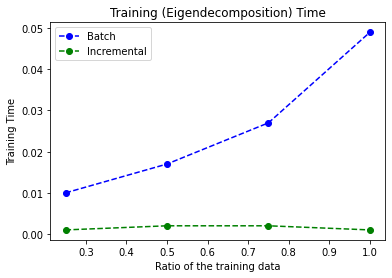

In [ ]:
import matplotlib.pyplot as plt
plt.title('Training (Eigendecomposition) Time')
line1,=plt.plot([0.25,0.5,0.75,1],[0.010,0.017,0.027,0.049], linestyle='--', marker='o', color='b', label='BPCA')
# line2,=plt.plot( [0.25,0.5,0.75,1],[3.1450,3.3135,3.7595,4.1435], linestyle='--', marker='o', color='g', label='IPCA')
line2,=plt.plot( [0.25,0.5,0.75,1],[0.001,0.002,0.002,0.001], linestyle='--', marker='o', color='g', label='IPCA')
plt.legend([line1, line2],['Batch','Incremental'])
plt.xlabel('Ratio of the training data')
plt.ylabel('Training Time')
# plt.yticks([round(max(data),2),round(max(data2),2)])
# plt.axhline(y=max(data), ls='--', c='blue')
# plt.axhline(y=max(data2), ls='--', c='green')
plt.savefig('ACC.png')
plt.show()

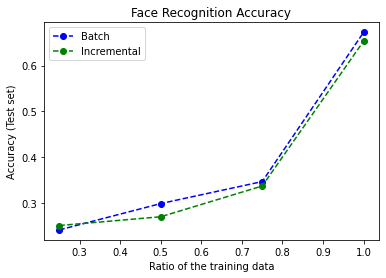

In [ ]:
import matplotlib.pyplot as plt
plt.title('Face Recognition Accuracy')
line1,=plt.plot([0.25,0.5,0.75,1],[0.2404,0.2981,0.3462,0.6731], linestyle='--', marker='o', color='b', label='BPCA')
# line2,=plt.plot( [0.25,0.5,0.75,1],[3.1450,3.3135,3.7595,4.1435], linestyle='--', marker='o', color='g', label='IPCA')
line2,=plt.plot( [0.25,0.5,0.75,1],[0.2500,0.2692,0.3365,0.6538], linestyle='--', marker='o', color='g', label='IPCA')
plt.legend([line1, line2],['Batch','Incremental'])
plt.xlabel('Ratio of the training data')
plt.ylabel('Accuracy (Test set)')
# plt.yticks([round(max(data),2),round(max(data2),2)])
# plt.axhline(y=max(data), ls='--', c='blue')
# plt.axhline(y=max(data2), ls='--', c='green')
plt.savefig('ACC.png')
plt.show()

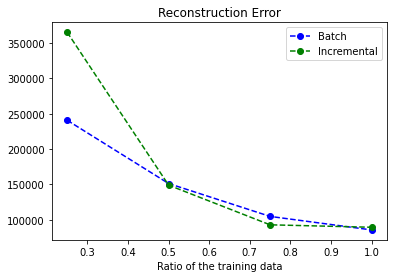

In [ ]:
import matplotlib.pyplot as plt
plt.title('Reconstruction Error')
line1,=plt.plot([0.25,0.5,0.75,1],[240804.8,151245.8,104699.5,85575], linestyle='--', marker='o', color='b', label='BPCA')
# line2,=plt.plot( [0.25,0.5,0.75,1],[3.1450,3.3135,3.7595,4.1435], linestyle='--', marker='o', color='g', label='IPCA')
line2,=plt.plot( [0.25,0.5,0.75,1],[365412,148933,92795,89334], linestyle='--', marker='o', color='g', label='IPCA')
plt.legend([line1, line2],['Batch','Incremental'])
plt.xlabel('Ratio of the training data')
# plt.ylabel('Reconstruction Error')
# plt.yticks([round(max(data),2),round(max(data2),2)])
# plt.axhline(y=max(data), ls='--', c='blue')
# plt.axhline(y=max(data2), ls='--', c='green')
plt.savefig('ACC.png')
plt.show()